Źródło: https://www.springboard.com/blog/data-mining-python-tutorial/

Źródło danych: https://www.kaggle.com/harlfoxem/housesalesprediction

# Regresja liniowa

Jedną z metod analizy danych jest regresja.
Regresja pozwala na oszacowanie zależności pomiędzy zmiennymi poprzez optymalizację redukcji błędu.

W tym ćwiczeniu zajmiemy się szacowaniem liniowej zależności pomiędzy zmiennymi.
Wypiszemy współczynniki korelacji i przedstawimy na wykresie linię najlepszego dopasowania.
Analizie poddamy dane dotyczące sprzedaży domów w King's County.
Dane zostały pobrane z serwisu Kaggle: https://www.kaggle.com/datasets

W danych zawarte są informacje na temat cen domów i cech domów, takich jak metraż.
Spróbujemy oszacować zależność pomiędzy ceną domu a jego powierzchnią.

Skorzystamy z kilku przydatnych bibliotek:
- pandas do pracy z ramkami danych
- matplotlib do tworzenia wykresów
- scipy do obliczeń statystycznych
- seaborn do wizualizacji danych statystycznych

Na początku importujemy potrzebne biblioteki, które należy wcześniej zainstalować.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Sprawdzamy, czy w danych znajdują się puste (null) wartości.
Gdyby takie były, musielibyśmy je odfiltrować, albo usunąć.

In [3]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Sprawdzamy typ danych, żeby lepiej się w nich orientować.

In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Zanim zaczniemy pracę z danymi, musmy o nich wiedzieć trochę więcej.
Spójrzmy na statystyki.

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Najważniejsze wartości, na które należy zwrócić uwagę:
- Mamy 21 613 obserwacji
- Średnia cena domu wynosi ok. 540 000 dolarów
- Mediana ceny to ok. 450 000 dolarów
- Średnia powieżchnia to ok. 2080 stóp kwadratowych (ok. 193 metrów kwadratowych)

Ponieważ chcemy analizować zależność ceny od powierzchni,
to przyjrzymy się hostogramom tych dwóch czynników.

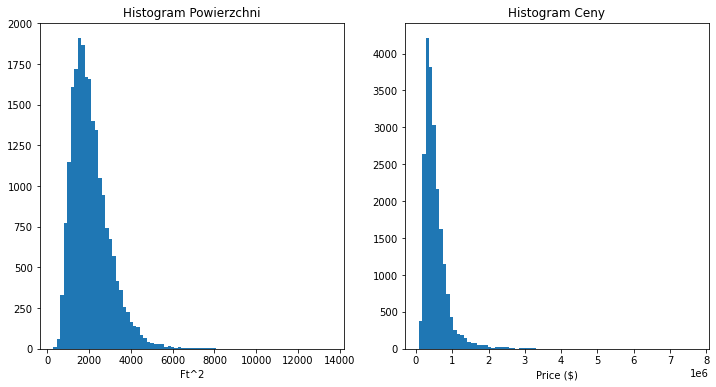

In [6]:
fig = plt.figure(figsize=(12, 6))
sqft = fig.add_subplot(121)
cost = fig.add_subplot(122)

sqft.hist(df.sqft_living, bins=80)
sqft.set_xlabel('Ft^2')
sqft.set_title("Histogram Powierzchni")

cost.hist(df.price, bins=80)
cost.set_xlabel('Price ($)')
cost.set_title("Histogram Ceny")

plt.show()

Zwróćmy uwagę na kształt histogramów.

Teraz, gdy już wiemy jak wyglądają nasze dane, możemy przejść do analizy regresji liniowej.

Najpierw będzie nam potrzebna funkcja estymatora regresji metodą najmniejszych kwadratów z modułu *statsmodels*.
Wykorzystamy ją do analizy zależności pomiędzy ceną a powierzchnią.

In [7]:
from statsmodels.formula.api import ols

m = ols('price ~ sqft_living',df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        07:40:03   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      

W podsumowaniu widzimy wszystkie nawjażniejsze informacje, takie jak błąd standardowy czy współczynnniki korelacji.

Możemy zauważyć, że relacja pomiędzy ceną a powierzchnią jest bardzo znacząca, ponieważ wskaźnik t-value wynosi 144.920,
a P>|t| wynosi 0%, co w skrócie oznacza, że ta relacja ma szansę bliską zeru na powstanie wskutek statystycznej zmienności lub przypadku.

Możemy też wyciągnąć pewne wnioski na podstawie tej relacji.
Ze względu na jej wielkość można wnioskować, że na każde dodatkowe 100 stóp kwadratowych cena będzie wyższa o średnio 28 000 dolarów.

Spróbujmy teraz dokonać analizy dodając więcej niezależnych zmiennych.

In [8]:
m = ols('price ~ sqft_living + bedrooms + grade + condition',df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     6749.
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        07:40:03   Log-Likelihood:            -2.9884e+05
No. Observations:               21613   AIC:                         5.977e+05
Df Residuals:                   21608   BIC:                         5.977e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.398e+05   1.81e+04    -40.855      

Powyższe wyniki pokazuję, że dodanie dodatkowych zmiennych niezależnych, takich jak ilość sypialni, pozwala zwiększyć współczynnik R-squared.
Oznacza to, że zwiększyliśmy procent zmienności w modelu, jaki możemy wyjaśnić.

Na koniec przedstawmy nasz model regresji liniowej w formie graficznej.
Do tego celu skorzystamy z modułu *seaborn*.

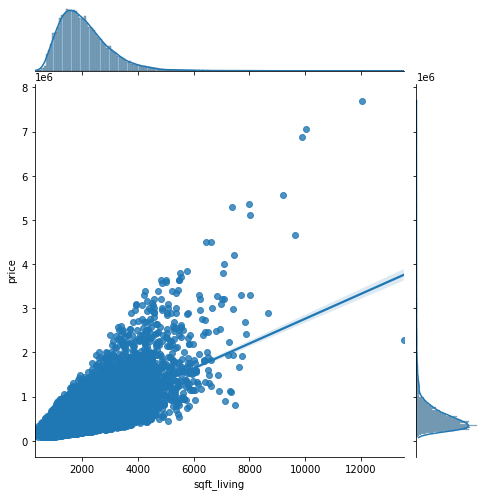

In [10]:
sns.jointplot(x="sqft_living", y="price", data=df, kind = 'reg',fit_reg= True, height = 7)
plt.show()